# <center>Organizaci&oacute;n de Datos</center>
## <center>Trabajo Práctico 1 : Reservas de Hotel</center>
## <center>Checkpoint 3</center>
### <center>Ensambles</center>

#### Integrantes grupo 19: Sudanalytics 
* Adrian Leandro Re
* Alan Toulouse
* Luciano Lorenzo
* Nicolas Tonizzo

# Imports y preparacion del dataset

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import make_scorer, f1_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [28]:
df = pd.read_csv("../dataset/hotels_train_procesado.csv")
df.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status_date', 'id', 'is_canceled', 'hotel_encoding',
       'tiene_hijos', 'es_extranjero', 'es_portugues', 'es_ingles',
       'es_frances', 'es_espanol', 'es_aleman', 'reserved_room_was_assigned',
       'required_a_car_parking_space', 'solo_desayuna_en_el_hotel',
       'pidio_todas_comidas', 'reservo_online', 'reservo_en_grupo',
       'reservo_sin_reembols

Declaramos el target y los features del dataframe que vamos a utilizar para predecir.

In [29]:
target = "is_canceled"

attrs = [
    "hotel_encoding",
    
    "lead_time",
    "reservo_el_mismo_dia",
    "adr",

    "stays_in_weekend_nights",
    "stays_in_week_nights",

    "tiene_hijos",
    "adults",
    # "children",
    # "babies",

    # Fechas
    "arrival_date_week_number",
    "arrival_date_day_of_month",
    "arrival_date_year",

    "es_extranjero",
    "es_portugues",
    "es_ingles",
    "es_frances",
    "es_espanol",
    "es_aleman",

    "reserved_room_was_assigned",

    "is_repeated_guest",
    "previous_cancellations", "previous_bookings_not_canceled",
    #"total_reservas_previas"
    "total_of_special_requests",
    "booking_changes",

    #'meal',
    "solo_desayuna_en_el_hotel",
    "pidio_todas_comidas",

    # 'required_car_parking_spaces',
    "required_a_car_parking_space",

    "reservo_sin_reembolso",
    "reservo_sin_depositar",
    "reservo_online",
    "reservo_en_grupo",
    "reservo_sin_compania",
    "reservo_sin_agente",
    "reservo_sin_paquete",
    
    # "days_in_waiting_list",
    "tuvo_dias_de_espera",
    
    "agent9",
    "agent240",
    "agent1",
    "agent14",
    "agent6",
]

dividimos el dataset en entrenamiento y validacion, para poder validar que no estamos overfitteando al dataset de entrenamiento, y que el modelo predice bien a registros no vistos anteriormente

In [30]:
X = df[attrs].values
y = df[target].values

X_train, X_val,  y_train, y_val = train_test_split(X, y, test_size=0.5, shuffle=True)

# Forest

In [31]:
rfc_default = RandomForestClassifier()
rfc_default.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [32]:
rfc = RandomForestClassifier()

In [33]:
model = rfc.fit(X = X_train, y = y_train)

In [34]:
model.score(X_val, y_val)

0.8793164712342927

In [35]:
y_pred = model.predict(X_val)
y_pred

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

precision 0.8843764305800798
recall 0.872958492027629
f1 0.8786303683971153


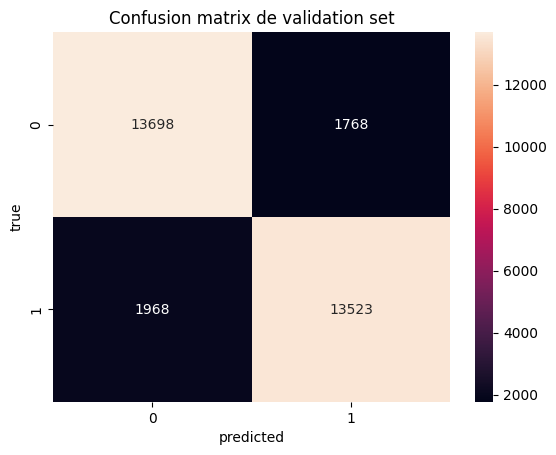

In [36]:
confusion = confusion_matrix(y_val, y_pred)
sns.heatmap(confusion, annot=True, fmt='.0f')
plt.ylabel('true')
plt.xlabel('predicted')
plt.title("Confusion matrix de validation set")
print("precision", precision_score(y_val, y_pred))
print("recall", recall_score(y_val, y_pred))
print("f1", f1_score(y_val,y_pred) )

In [37]:
model.classes_

array([0, 1], dtype=int64)

In [38]:
model.estimators_[37]

DecisionTreeClassifier(max_features='sqrt', random_state=182972868)

In [39]:
plt.figure(figsize=(100,100))
tree_plot = plot_tree(model.estimators_[37] ,
                         max_depth=1,
                         feature_names=df[attrs].columns.to_list(),
                         filled=True,
                         rounded=True,
                         class_names=True)
plt.show()

In [40]:
sorted(list(zip(df[attrs].columns.to_list(), model.feature_importances_)), key=lambda x: -x[1])

[('lead_time', 0.12606517887832155),
 ('adr', 0.07972991189866059),
 ('arrival_date_week_number', 0.06363817354362246),
 ('arrival_date_day_of_month', 0.0598061520640935),
 ('reservo_sin_depositar', 0.05966786204391363),
 ('reservo_sin_reembolso', 0.057439264869264914),
 ('total_of_special_requests', 0.05194472218721887),
 ('es_extranjero', 0.04500266133246702),
 ('es_portugues', 0.04160348899590849),
 ('reserved_room_was_assigned', 0.03953804002551065),
 ('stays_in_week_nights', 0.037671220299551396),
 ('agent9', 0.03632064456894414),
 ('reservo_online', 0.030263750909205047),
 ('required_a_car_parking_space', 0.02956580181480777),
 ('arrival_date_year', 0.028099670350029245),
 ('stays_in_weekend_nights', 0.024440698190615086),
 ('reservo_sin_paquete', 0.023808541679096674),
 ('booking_changes', 0.020729215828151588),
 ('previous_cancellations', 0.019022144837676388),
 ('agent240', 0.018910859230854424),
 ('adults', 0.015236973402643749),
 ('hotel_encoding', 0.010095274091853755),
 ('

aca podemos ver que columnas como 'lead_time' y 'reservo_sin_depositar' son las variables con mas importancia, y esto se demuestra ya que en el arbol son las primeras variables que dividen el conjunto de datos.
por el otro lado, tambien vemos variables como 'agent6' y 'tuvo_dias_de_espera' que tienen muy poca relevancia, lo que nos puede indicar que esta al ignorarlas para el entrenamiento, el resultado no cambiara mucho.

hacemos lo mismo pero con mas metricas envez de solo accuracy

In [41]:
kfoldcv = StratifiedKFold(n_splits=5)

rf_cv = RandomForestClassifier(oob_score=True, random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"], 
               "min_samples_leaf" : [1, 5, 10], 
               "min_samples_split" : [2, 4, 10, 12, 16], 
               "n_estimators": [50,100,200] }

metricas=['precision','f1','recall'] 

gs_multimetrica = GridSearchCV(estimator=rf_cv, 
                               param_grid=param_grid, 
                               scoring=metricas, 
                               refit=False, 
                               cv=kfoldcv, 
                               n_jobs=-1)

gs_multimetrica_fit = gs_multimetrica.fit(X = X_train, y = y_train)

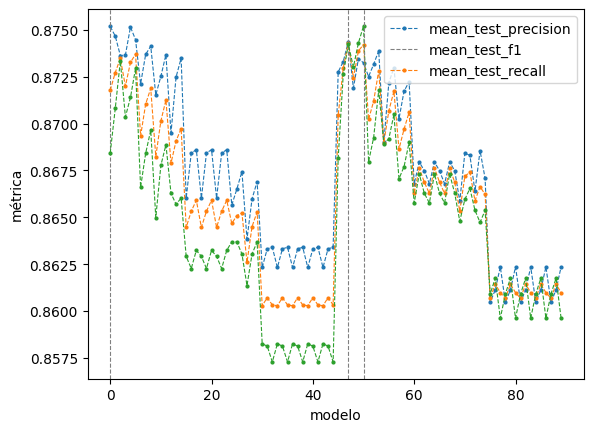

In [42]:
labels=[ key for key in gs_multimetrica_fit.cv_results_.keys() if("mean_test" in key)]

for k in labels:
    plt.plot(gs_multimetrica_fit.cv_results_[k],linestyle='--' , linewidth=0.8,marker='o',markersize=2)     
    x_linea=np.argmax(gs_multimetrica_fit.cv_results_[k])
    plt.axvline(x_linea,linestyle='--' ,linewidth=0.8,color='grey')
        
plt.xlabel("modelo", fontsize=10)
plt.ylabel("métrica", fontsize=10)
plt.legend(labels)
plt.show()

elegimos los paramtros donde en promedio tienen todos el mayor valor

In [43]:
params_elegidos=gs_multimetrica_fit.cv_results_['params'][np.argmax(gs_multimetrica_fit.cv_results_['mean_test_f1'])]
params_elegidos

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [48]:
rfc_multimetrica = RandomForestClassifier(criterion= params_elegidos['criterion'], 
                                          min_samples_leaf= params_elegidos['min_samples_leaf'], 
                                          min_samples_split= params_elegidos['min_samples_split'], 
                                          max_depth= params_elegidos['max_depth'], 
                                          oob_score=True, random_state=2, n_jobs=-1)

model_rfc_multimetrica = rfc_multimetrica.fit(X = X_train, y = y_train)

y_pred_model_rfc_multimetrica = model_rfc_multimetrica.predict(X_val)

precision 0.8839639171912519
recall 0.8792847459815377
f1 0.8816181229773463


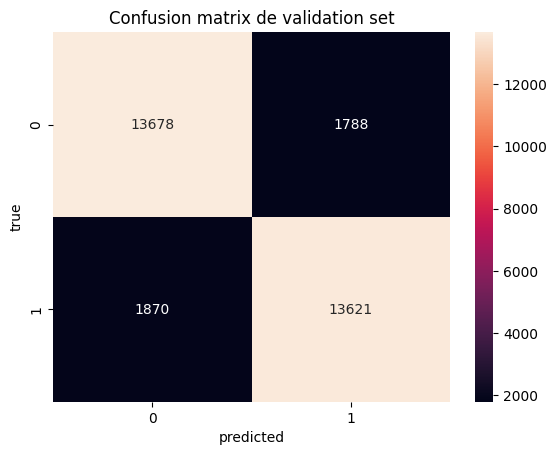

In [49]:
confusion = confusion_matrix(y_val, y_pred_model_rfc_multimetrica)
sns.heatmap(confusion, annot=True, fmt='.0f')
plt.ylabel('true')
plt.xlabel('predicted')
plt.title("Confusion matrix de validation set")
print("precision", precision_score(y_val, y_pred_model_rfc_multimetrica))
print("recall", recall_score(y_val, y_pred_model_rfc_multimetrica))
print("f1", f1_score(y_val,y_pred_model_rfc_multimetrica) )

devuelta podemos ver como todos los parametros mejoran

# Creacion de submit

In [50]:
df_test = pd.read_csv("../dataset/hotels_test_procesado.csv")
assert(len(df_test)==26535)

prediccion = model_rfc_multimetrica.predict(df_test[attrs].values)
assert(len(prediccion)==26535)

submit = pd.DataFrame(
    {"is_canceled": prediccion},
    index=df_test["id"],
)
assert(len(submit)==26535)

submit.to_csv("../dataset/submit.csv")

# Guardando el modelo con pickle

guardamos el random forest con pickle

In [51]:
import pickle

with open('../modelos/rf.pickle', 'wb') as file:
    pickle.dump(model_rfc_multimetrica, file)